# Homework 1: Linear Models for Regression and Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.datasets import load_boston
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
pd.options.mode.chained_assignment = None

## Part 1: Linear Regression

In part 1, we will use two datasets to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:
   
𝜖 ∼ Normal(0,3)

z = 3𝑥 + 10y + 𝜖

In [ ]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)   # Sample epsilon from a Normal distribution
x = np.linspace(0, 10, 100) # Sample x evenly between 0 and 10
y = np.linspace(0, 5, 100) # Sample z evenly between 10 and 0
z = 3 * x + 5 * y + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

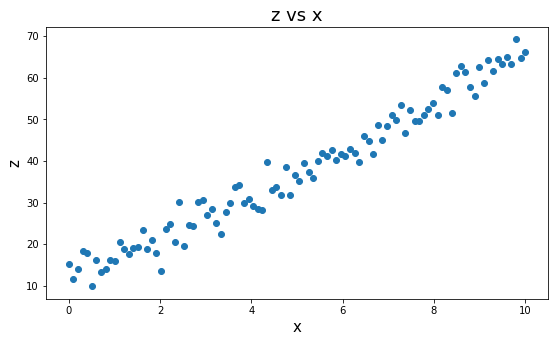

In [ ]:
### Your code here
plt.figure(figsize = (9,5))
plt.scatter(x,z)
plt.title('z vs x',fontsize = 18)
plt.xlabel('x',fontsize = 15)
plt.ylabel('z',fontsize = 15)
plt.show()

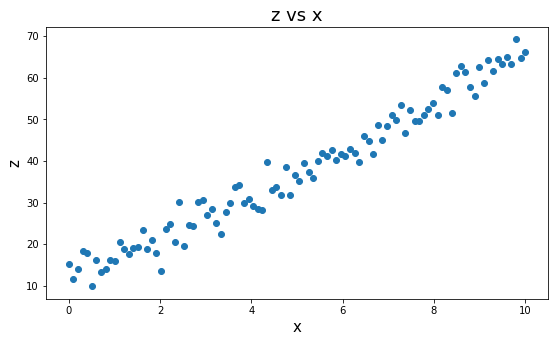

In [ ]:
plt.figure(figsize = (9,5))
plt.scatter(x,z)
plt.title('z vs x',fontsize = 18)
plt.xlabel('x',fontsize = 15)
plt.ylabel('z',fontsize = 15)
plt.show()

Both follow linear relationship

**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(y, x)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000


The parameter associated with a independent feature is estimated by linear regression by assumpting that the other features are constant. To put it in simple terms, the parameter of x will give the value how much value of z will increase on unit increase of x keeping y constant. If this assumption is violated, it affects the variance associated with the prediction as the quality of the interpretation of the independent variables is reduced. One imporatnt thing to note is the accuracy, doesn't go down but we are no longer sure of on how the model takes the inputs to produce the output. 

The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label,

In [ ]:
auto_mpg_df = pd.read_csv('Car details v3.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing, the idea of the 
# exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)


In [ ]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.3. Missing Value analysis - Auto mpg dataset. 
Are thre any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

In [ ]:
auto_mpg_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

As the same rows have missing data and the missing data compromises of only 2.7% data we can remove the rows directly.

In [ ]:
auto_mpg_df = auto_mpg_df.loc[auto_mpg_df['mileage'].isnull() == False]

In [ ]:
auto_mpg_df.shape[0]

7907

In [ ]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.4. The features engine, max_power and mileage have units in the dataset. In the real world, we have such datasets, remove the units from each feature. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on. After doing so, convert the datatype of these columns to float.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [ ]:
auto_mpg_df['engine'] = auto_mpg_df['engine'].str[:-3]
auto_mpg_df['max_power'] = auto_mpg_df['max_power'].str[:-4]
auto_mpg_df = auto_mpg_df[auto_mpg_df['max_power'] != '']
auto_mpg_df['mileage'] = auto_mpg_df['mileage'].str[:-5]
auto_mpg_df['mileage'] = auto_mpg_df['mileage'].str.replace(r' ', '')

In [ ]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 803.0+ KB


In [ ]:
auto_mpg_df = auto_mpg_df.astype({'engine':int})
auto_mpg_df = auto_mpg_df.astype({'mileage':float})
auto_mpg_df = auto_mpg_df.astype({'max_power':float})

In [ ]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


In [ ]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Label your axes while plotting.**

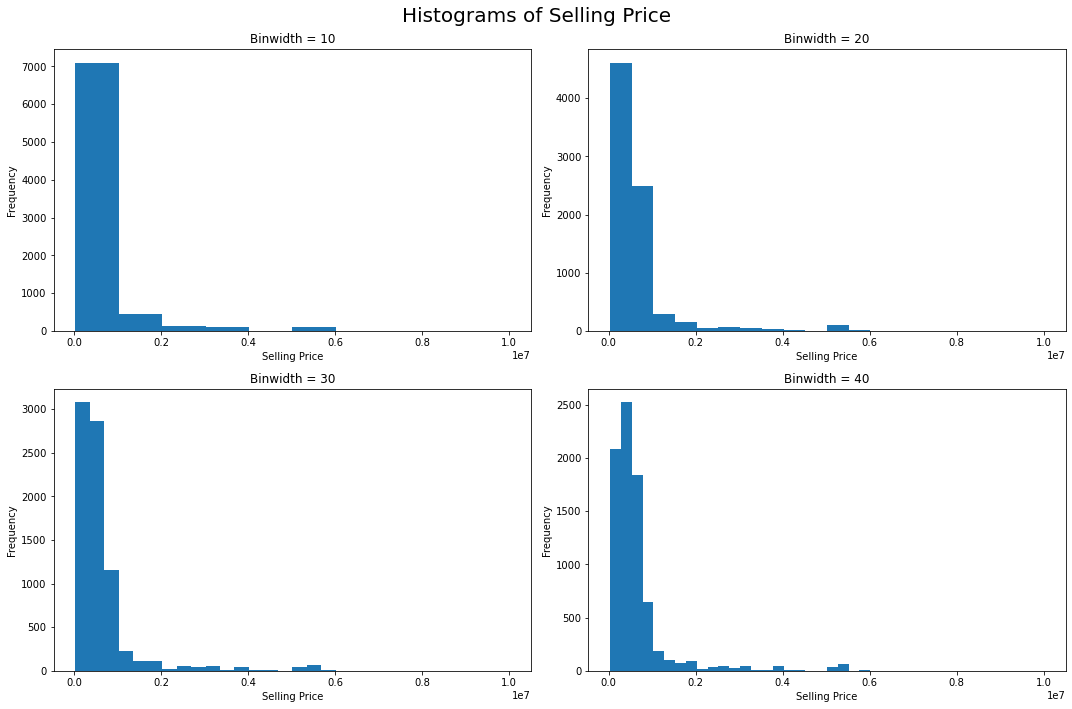

In [ ]:
### Your code here
fig = plt.figure(figsize = (15,10))
fig.suptitle('Histograms of Selling Price', fontsize = 20)

ax1 = plt.subplot2grid((2,2),(0,0))
ax1.hist(auto_mpg_y,bins = 10)
ax1.set_xlabel('Selling Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Binwidth = 10')

ax1 = plt.subplot2grid((2,2),(0,1))
ax1.hist(auto_mpg_y,bins = 20)
ax1.set_xlabel('Selling Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Binwidth = 20')

ax1 = plt.subplot2grid((2,2),(1,0))
ax1.hist(auto_mpg_y,bins = 30)
ax1.set_xlabel('Selling Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Binwidth = 30')

ax1 = plt.subplot2grid((2,2),(1,1))
ax1.hist(auto_mpg_y,bins = 40)
ax1.set_xlabel('Selling Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Binwidth = 40')

plt.tight_layout()

plt.show()


**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

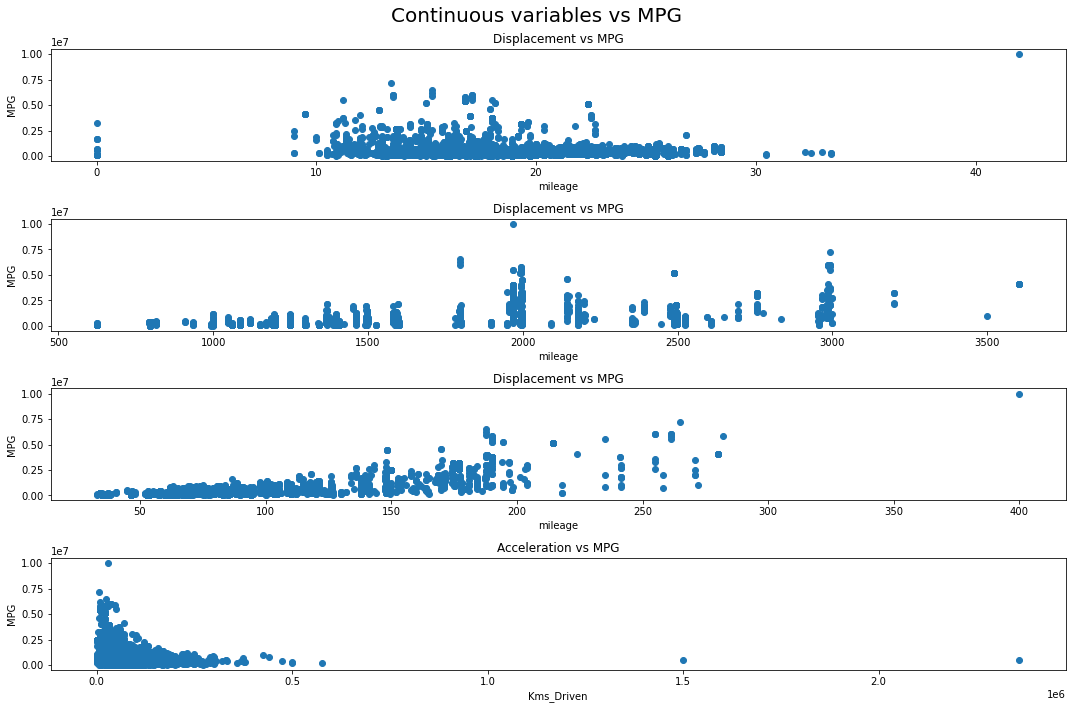

In [ ]:
### Your code here
### Your code here
fig = plt.figure(figsize = (15,10))
fig.suptitle('Continuous variables vs MPG', fontsize = 20)

ax1 = plt.subplot2grid((4,1),(0,0))
ax1.scatter(auto_mpg_X['mileage'],auto_mpg_y)
ax1.set_xlabel('mileage')
ax1.set_ylabel('MPG')
ax1.set_title('Displacement vs MPG')

ax1 = plt.subplot2grid((4,1),(1,0))
ax1.scatter(auto_mpg_X['engine'],auto_mpg_y)
ax1.set_xlabel('mileage')
ax1.set_ylabel('MPG')
ax1.set_title('Displacement vs MPG')

ax1 = plt.subplot2grid((4,1),(2,0))
ax1.scatter(auto_mpg_X['max_power'],auto_mpg_y)
ax1.set_xlabel('mileage')
ax1.set_ylabel('MPG')
ax1.set_title('Displacement vs MPG')

ax1 = plt.subplot2grid((4,1),(3,0))
ax1.scatter(auto_mpg_X['km_driven'],auto_mpg_y)
ax1.set_xlabel('Kms_Driven')
ax1.set_ylabel('MPG')
ax1.set_title('Acceleration vs MPG')

plt.tight_layout()

plt.show()


Any of the features do not rigrously follow the linear relationship with the target feature. Moreover, they seem to have outliers. Because of all of these voilations of Linear regression assumptions, the model would not be a great fit.

**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

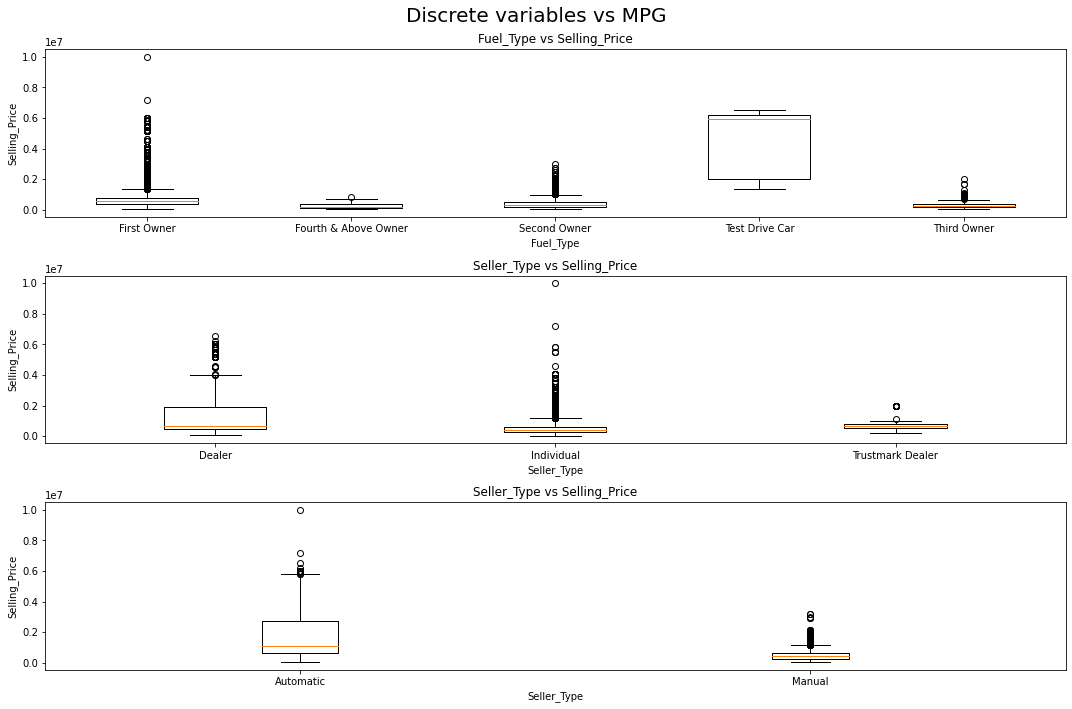

In [ ]:
### Your code here
### Your code here
### Your code here
fig = plt.figure(figsize = (15,10))
fig.suptitle('Discrete variables vs MPG', fontsize = 20)

ax1 = plt.subplot2grid((3,1),(0,0))
a_label = np.sort(auto_mpg_df['owner'].unique())
a = [auto_mpg_df.loc[auto_mpg_df['owner'] == i,'selling_price'] for i in a_label]
ax1.boxplot(a,labels = np.asarray(a_label))
ax1.set_xlabel('Fuel_Type')
ax1.set_ylabel('Selling_Price')
ax1.set_title('Fuel_Type vs Selling_Price')

ax1 = plt.subplot2grid((3,1),(1,0))
a_label = np.sort(auto_mpg_df['seller_type'].unique())
a = [auto_mpg_df.loc[auto_mpg_df['seller_type'] == i,'selling_price'] for i in a_label]
ax1.boxplot(a,labels = np.asarray(a_label))
ax1.set_xlabel('Seller_Type')
ax1.set_ylabel('Selling_Price')
ax1.set_title('Seller_Type vs Selling_Price')

ax1 = plt.subplot2grid((3,1),(2,0))
a_label = np.sort(auto_mpg_df['transmission'].unique())
a = [auto_mpg_df.loc[auto_mpg_df['transmission'] == i,'selling_price'] for i in a_label]
ax1.boxplot(a,labels = np.asarray(a_label))
ax1.set_xlabel('Seller_Type')
ax1.set_ylabel('Selling_Price')
ax1.set_title('Seller_Type vs Selling_Price')

plt.tight_layout()

plt.show()

**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

Linear regression is a good choice looking at some of the categorical features but looking at some of the numerical features we can see that they do not strictly follow linear relationship so it makes more sense to try non-linear models. 

In [ ]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [ ]:
auto_mpg_X

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,7,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,13,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,Maruti Swift Dzire ZDi,11,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,Tata Indigo CR4,7,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


In [ ]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


### Data Pre-processing

**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [ ]:
# 1. No categorical features in the synthetic dataset (skip this step)
transmission_mapper = {'Manual':0,'Automatic':1}
auto_mpg_X['transmission'] = auto_mpg_X['transmission'].map(transmission_mapper)

seller_type_mapper = {'Individual':1,'Dealer':2,'Trustmark Dealer':3}
auto_mpg_X['seller_type'] = auto_mpg_X['seller_type'].map(seller_type_mapper)

owner_mapper = {'Fourth & Above Owner':1,'Third Owner':2,'Second Owner':3,'First Owner':4,'Test Drive Car':5}
auto_mpg_X['owner'] = auto_mpg_X['owner'].map(owner_mapper)

auto_mpg_X=pd.get_dummies(auto_mpg_X,columns=['fuel','seller_type'],drop_first=True)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets

auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=20)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=20)


# 3. Standardize the columns in the feature matrices
### The question asked for Standard Scaler but MinMaxScaler is used as this gives better result. 
### No point has been deducted for using Standard Scaler. This is just to show that we should ideally try different
### settings while training the model and see which gives the best result.
scaler = MinMaxScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)   # Fit and transform scalar on X_train
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)           # Transform X_val
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)         # Transform X_test


# 4. Add a column of ones to the feature matrices

auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])


[[1.         0.15384615 0.00423826 1.         0.75       0.42763158
  0.32684564 0.28370787 0.375      0.         0.         1.
  1.         0.        ]
 [1.         0.15384615 0.03432993 0.         0.25       0.55322967
  0.19228188 0.21268058 0.375      0.         0.         1.
  0.         0.        ]
 [1.         0.34615385 0.06526925 0.         0.75       0.68779904
  0.2590604  0.22953451 0.375      1.         0.         0.
  0.         0.        ]
 [1.         0.07692308 0.01017183 1.         0.75       0.53229665
  0.29261745 0.29173355 0.375      0.         0.         1.
  0.         0.        ]
 [1.         0.07692308 0.01652923 0.         0.75       0.56818182
  0.19228188 0.21268058 0.375      0.         0.         1.
  0.         0.        ]] 

 4786     645000
3744     270000
6684     320000
680     1100000
4649     600000
Name: selling_price, dtype: int64


At the end of this pre-processing, you should have the following vectors and matrices:
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`.** You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [ ]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        
        Returns
        -------
        None
        '''
        ### Your code here
        self.w = np.dot(np.dot(inv(np.dot(X.transpose(),X) + np.diag([self.alpha]* X.shape[1])),X.transpose()),y)
        return None
        
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return np.dot(X,self.w)

### Train, Evaluate, and Interpret Linear Regression Model

**1.11. Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [ ]:
### Your code here
linear_regression = LinearRegression()
linear_regression.train(auto_mpg_X_train,auto_mpg_y_train)
train_output = linear_regression.predict(auto_mpg_X_train)
val_output = linear_regression.predict(auto_mpg_X_val)
test_output = linear_regression.predict(auto_mpg_X_test)
print("X_test predicted values:\n")
print(test_output[0:5])
print('')
print("y_test values:\n")
print(auto_mpg_y_test[0:5])
print('')
print('MSE:')
print("Training error:",np.mean((auto_mpg_y_train - train_output)**2))
print("Validation error:",np.mean((auto_mpg_y_val - val_output)**2))
print("Test error:",np.mean((auto_mpg_y_test - test_output)**2))

X_test predicted values:

[ 337807.16803139  604413.25473782 1172057.57353573  533903.11633587
  992617.94209279]

y_test values:

5102    475000
6876    400000
2949    750000
5574    530000
323     650000
Name: selling_price, dtype: int64

MSE:
Training error: 207076071232.94363
Validation error: 210246361875.17654
Test error: 228031934532.95898


**As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline.** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [ ]:
### Your code here
print("Baseline - mean of tarining labels:",np.mean(auto_mpg_y_train))
print("Training error:",np.mean((np.mean(auto_mpg_y_train) - train_output)**2))
print("Validation error:",np.mean((np.mean(auto_mpg_y_train) - val_output)**2))
print("Test error:",np.mean((np.mean(auto_mpg_y_train) - test_output)**2))

Baseline - mean of tarining labels: 651807.7020872865
Training error: 440618957309.83344
Validation error: 418995450442.0767
Test error: 462489986624.84076


**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights.** Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. **According to your model, which features are the greatest contributors to the selling price?**

In [ ]:
### Your answer here
l1 = ['bias']
l1.extend(auto_mpg_X.columns)

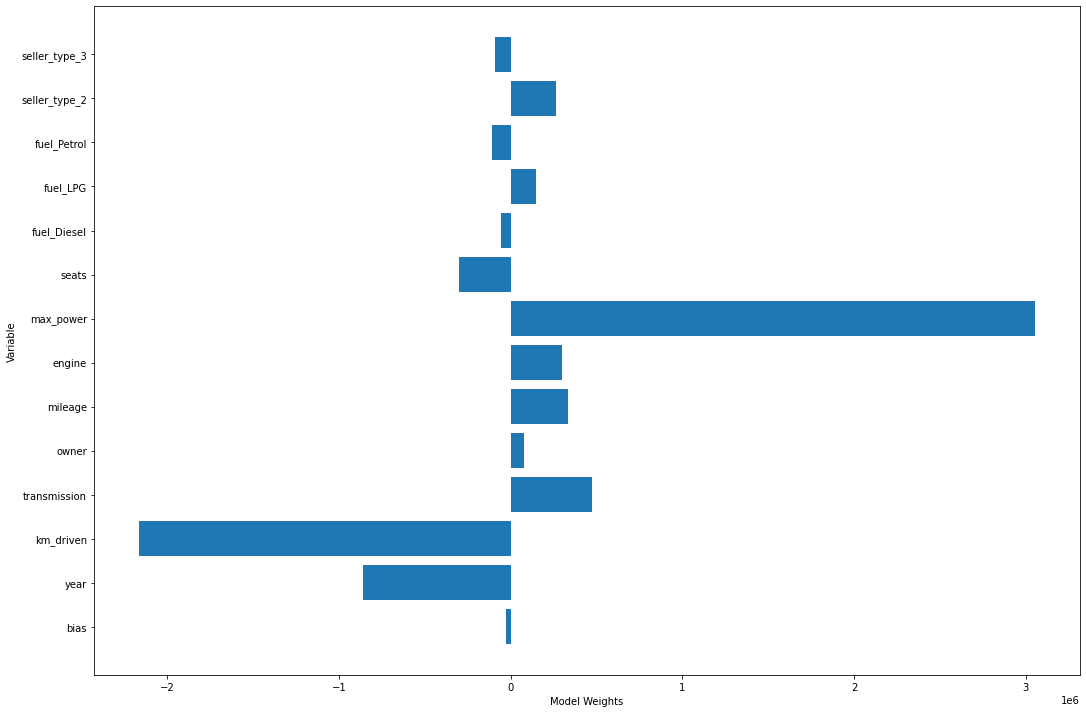

In [ ]:
### Your code here
fig = plt.figure(figsize = (15,10))
plt.barh(y = l1,width = linear_regression.w)
plt.tight_layout()
plt.xlabel('Model Weights')
plt.ylabel('Variable')
plt.show()

Answer would be different for different random state. Based on the above plot, max_power and km_driven are greatest contributor.

### Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

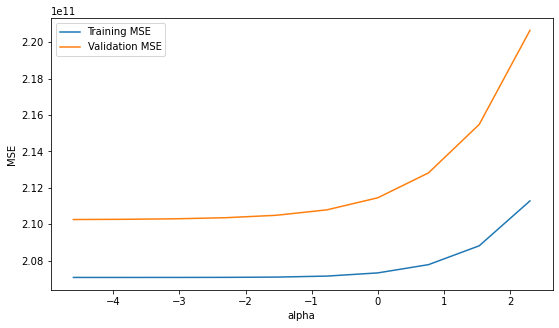

In [ ]:
### Your code here
train_mse = []
val_mse = []
test_mse = []
alphas = np.logspace(-2, 1, 10)

for i in alphas:
    linear_regression = LinearRegression(alpha = i)
    linear_regression.train(auto_mpg_X_train,auto_mpg_y_train)
    train_output = linear_regression.predict(auto_mpg_X_train)
    val_output = linear_regression.predict(auto_mpg_X_val)
    test_output = linear_regression.predict(auto_mpg_X_test)
    train_mse.append(np.mean((auto_mpg_y_train - train_output)**2))
    val_mse.append(np.mean((auto_mpg_y_val - val_output)**2))
    test_mse.append(np.mean((auto_mpg_y_test - test_output)**2))

fig = plt.figure(figsize = (9,5))
plt.plot(np.log(alphas),train_mse, label = "Training MSE")
plt.plot(np.log(alphas),val_mse, label = "Validation MSE")
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()


**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

In [ ]:
### Your answer here
'''When model complexity is high (low alpha), we overfit the training data, as indicated
by a low training MSE but high validation MSE. As model complexity decreases, we see
the validation MSE decreasing up to a point. But as model complexity decreases further,
both the training and validation MSE increase rapidly.'''

'When model complexity is high (low alpha), we overfit the training data, as indicated\nby a low training MSE but high validation MSE. As model complexity decreases, we see\nthe validation MSE decreasing up to a point. But as model complexity decreases further,\nboth the training and validation MSE increase rapidly.'

**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE.** This is the final tuned model which you would deploy in production.

In [ ]:
### Your code here
print('The best validation error is for alpha:',alphas[0])
linear_regression = LinearRegression(alpha = alphas[0])
linear_regression.train(auto_mpg_X_train,auto_mpg_y_train)
train_output = linear_regression.predict(auto_mpg_X_train)
val_output = linear_regression.predict(auto_mpg_X_val)
test_output = linear_regression.predict(auto_mpg_X_test)
print("Training error:",np.mean((auto_mpg_y_train - train_output)**2))
print("Validation error:",np.mean((auto_mpg_y_val - val_output)**2))
print("Test error:",np.mean((auto_mpg_y_test - test_output)**2))


The best validation error is for alpha: 1e-05
Training error: 207076071232.99255
Validation error: 210246371945.11417
Test error: 228031944365.2114


# **Part 2: Logistic Regression**

Gender Recognition by Voice and Speech Analysis

This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score,StratifiedKFold
%matplotlib inline

In [ ]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [ ]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

In [ ]:
#code here
#Finding distribution of labels in the dataset

print(voice_df["label"].value_counts(normalize=True))
print("The Probability of observing Male is", voice_df["label"].value_counts().max()/voice_df.count()[0])
print()

male      0.5
female    0.5
Name: label, dtype: float64
The Probability of observing Male is 0.5



**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

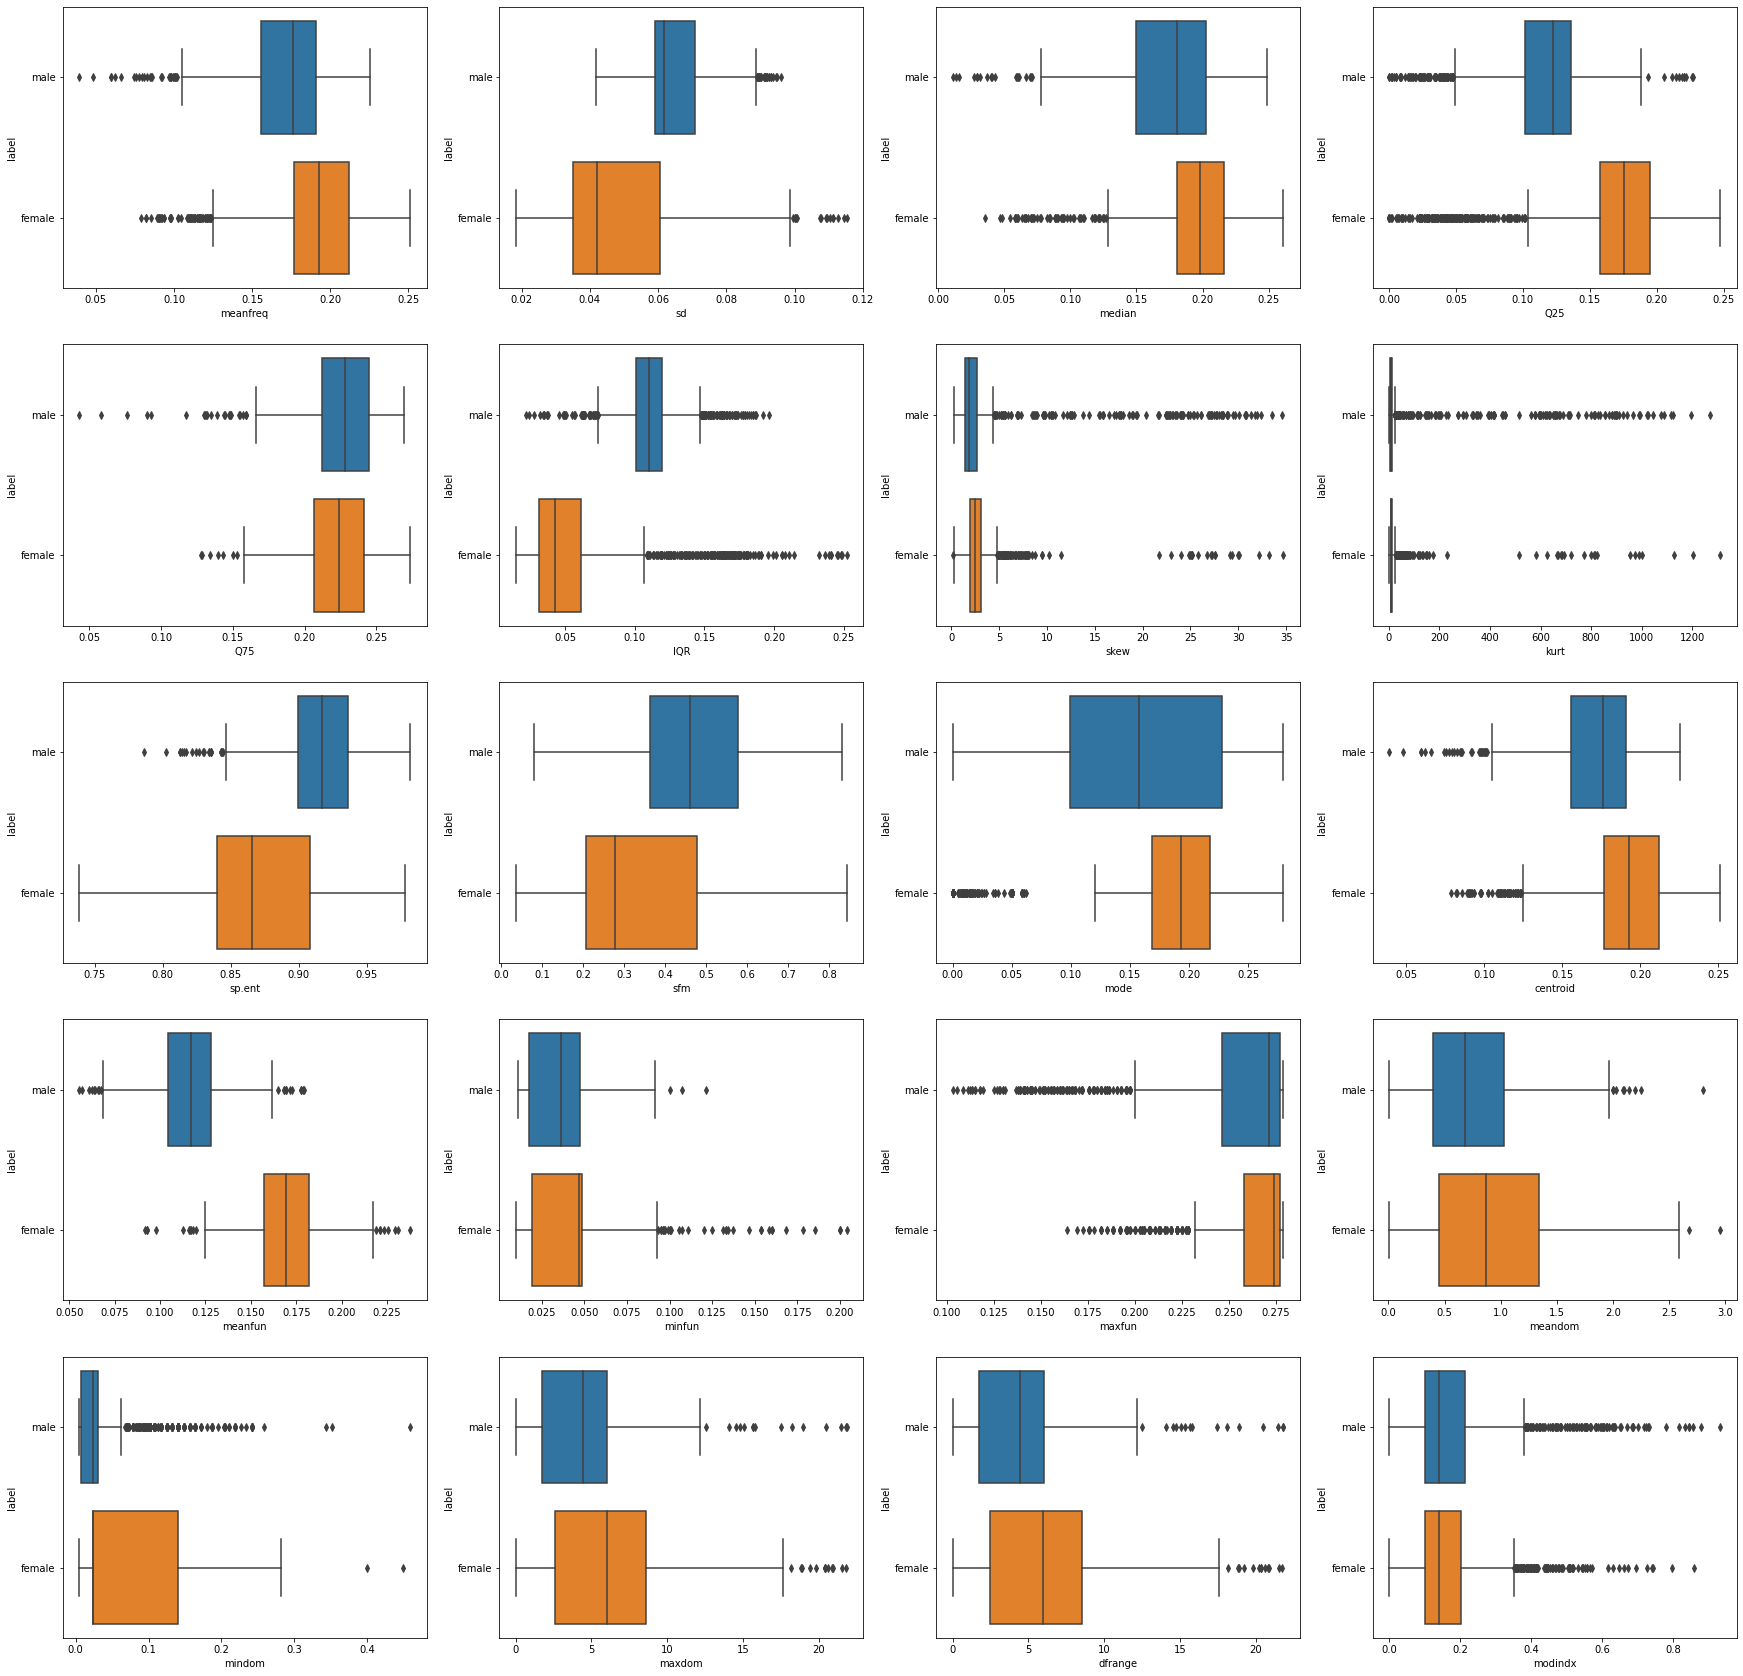

In [ ]:
#code here
features = voice_df.columns
fig, axes = plt.subplots(5, 4, figsize=(30, 30))
count=0
for i in range(0,5):
    for j in range(0,4):
        sns.boxplot(ax=axes[i][j], x=features[count], y=voice_df["label"], data=voice_df)
        count = count + 1

#Any information w.r.t. to Outliers observed or distribution of labels with respect to features. 

**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?** *italicized text*

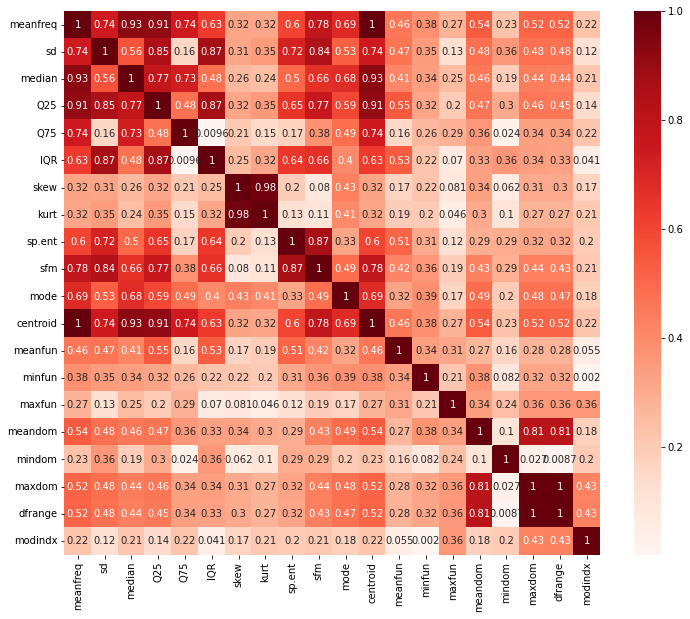

In [ ]:
#code here
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor_matrix = voice_df.corr().abs()
sns.heatmap(cor_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)
voice_df1 = voice_df.drop(columns=to_drop)
print(voice_df1.columns)

#Redundant information
#Similar features will not benefit model to learn something unique. 


['median', 'Q25', 'kurt', 'centroid', 'dfrange']
Index(['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'modindx',
       'label'],
      dtype='object')


**2.4 Separating Features & Y variable from the processed dataset**

In [ ]:
# Split data into features and labels
voice_X = voice_df1.drop(columns=['label'])
voice_y = voice_df1['label']
print(voice_X.columns)

Index(['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom',
       'modindx'],
      dtype='object')


**2.5 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [ ]:
#code here

#OrdinalEncoding for Label
#Scaling 

encoder = OrdinalEncoder()
voice_y_encoded = encoder.fit_transform(np.reshape(np.array(voice_y),(-1,1)))

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
voice_X_dev, voice_X_test, voice_y_dev, voice_y_test = train_test_split(voice_X, voice_y_encoded, test_size=0.2, random_state=0)
voice_X_train, voice_X_val, voice_y_train, voice_y_val = train_test_split(voice_X_dev, voice_y_dev, test_size=0.25, random_state=0)


# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
voice_X_train = scaler.fit_transform(voice_X_train)   # Fit and transform scalar on X_train
voice_X_val = scaler.transform(voice_X_val)           # Transform X_val
voice_X_test = scaler.transform(voice_X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
voice_X_train = np.hstack([np.ones((voice_X_train.shape[0], 1)), voice_X_train])
voice_X_val = np.hstack([np.ones((voice_X_val.shape[0], 1)), voice_X_val])
voice_X_test = np.hstack([np.ones((voice_X_test.shape[0], 1)), voice_X_test])

print(voice_X_train.shape, voice_y_train.shape)
print(voice_X_val.shape, voice_y_val.shape)
print(voice_X_test.shape, voice_y_test.shape)

(1900, 16) (1900, 1)
(634, 16) (634, 1)
(634, 16) (634, 1)


**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [ ]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None
            
    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        ### Your code here
        totalLoss = np.array(np.zeros(self.t))
        for i in range(self.t):
            loss = self.calculate_loss(X, y)
            totalLoss[i]=loss
            self.calculate_gradient(X,y)
        return totalLoss
    
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        ### Your code here
        #the thresholding is done below while calling the logistic regression
        #Generally you can do the thresholding here too.. 
        return self.calculate_sigmoid(np.dot(X,self.w))
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        ### Your code here
        total_cost = (-y * np.log(self.predict(X)) - (1 - y) * np.log(1 - (self.predict(X)))).mean() +(self.alpha * np.linalg.norm(self.w,2))
        return total_cost
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        ### Your code here
        J =  (np.dot(np.transpose(X), (self.predict(X) - y))) + (2 * self.alpha * self.w)
        self.w = self.w - J * self.eta 
        return (self.w)
        
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        ### Your code here
        return (1/(1+np.exp(-x)))

**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model (alpha=0, t=100, eta=1e-3) on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using alpha between (0,1), eta between(0, 0.001) and t between (0, 100), find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

[-0.21414122 -0.07586946  0.18407835  0.47594783  0.87734147 -0.1872868
  0.40095762 -0.24165785  0.11385949 -2.46409575  0.2371299  -0.22298039
  0.01019554 -0.09920704 -0.00787617 -0.15098148]


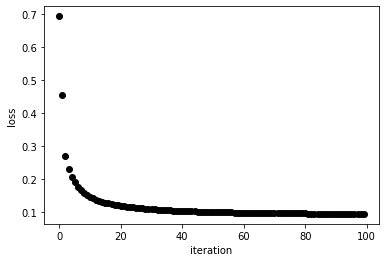

In [ ]:
eta = 1e-3
alpha = 0.0
t=100

lr_base = LogisticRegression(alpha,t,eta)
lr_base.w =np.array(np.zeros(voice_X_train.shape[1]))
lr_base.w = np.reshape(lr_base.w,(-1,1))
loss = lr_base.train(voice_X_train, voice_y_train)

for indx in range(len(loss)):
    plt.plot(indx, loss[indx], 'o', color='black');    
    plt.xlabel("iteration");
    plt.ylabel("loss");
    
print(lr.w.flatten())

In [ ]:
for i in range(20):
  alpha = random.uniform(0, 1)
  eta = random.uniform(0, 0.001)
  t = random.randint(0, 100)
  lr = LogisticRegression(alpha,t,eta)
  lr.w =np.array(np.zeros(voice_X_train.shape[1]))
  lr.w = np.reshape(lr.w,(-1,1))
  loss = lr.train(voice_X_train, voice_y_train)
  y_pred_val = np.array(np.zeros(voice_y_val.shape[0]))
  y_pred_val = np.reshape(y_pred_val,(-1,1))
  voice_y_pred_val = lr.predict(voice_X_val)
  voice_y_pred_valArray = np.array(voice_y_pred_val);

  #thresholding code from logistic regression
  for index in range(len(voice_y_pred_valArray)):
    if(voice_y_pred_valArray[index] > 0.5):
        y_pred_val[index]=1
    elif (voice_y_pred_valArray[index] <= 0.5):
        y_pred_val[index]=0
  print("Learning Rate",eta)
  print("Alpha",alpha)
  print("T=",t)
  print("Validation accuracy", accuracy_score(voice_y_val, y_pred_val))
  print("\n")

Learning Rate 0.0008609904763082925
Alpha 0.317274531432748
T= 87
Validation accuracy 0.9842271293375394


Learning Rate 0.0003352150994076844
Alpha 0.7654247784025517
T= 40
Validation accuracy 0.9763406940063092


Learning Rate 0.0006622655127708165
Alpha 0.8596786066253781
T= 35
Validation accuracy 0.9779179810725552


Learning Rate 0.0007064896005745822
Alpha 0.41942129841122755
T= 96
Validation accuracy 0.9842271293375394


Learning Rate 0.0001483529085113332
Alpha 0.17224192161150687
T= 83
Validation accuracy 0.9747634069400631


Learning Rate 0.0002661554584616553
Alpha 0.22923163893931975
T= 27
Validation accuracy 0.9668769716088328


Learning Rate 0.00043788621967480327
Alpha 0.7325066819630763
T= 98
Validation accuracy 0.9842271293375394


Learning Rate 0.00043106156758849123
Alpha 0.614399650425752
T= 77
Validation accuracy 0.9842271293375394


Learning Rate 0.000939112592017344
Alpha 0.49797959702797145
T= 59
Validation accuracy 0.9842271293375394


Learning Rate 0.000317961

In [ ]:
#Learning Rate 0.0009439296561552817
#Alpha 0.3044447438904413
#T= 84
#Validation accuracy 0.9842271293375394

eta = 0.0009
alpha = 0.304
t=84

lr_tune = LogisticRegression(alpha,t,eta)
lr_tune.w =np.array(np.zeros(voice_X_train.shape[1]))
lr_tune.w = np.reshape(lr_tune.w,(-1,1))
loss = lr_tune.train(voice_X_train, voice_y_train)

In [ ]:
#test predictions

y_pred_test = np.array(np.zeros(voice_y_test.shape[0]))
y_pred_test = np.reshape(y_pred_test,(-1,1))
voice_y_pred_test = lr_base.predict(voice_X_test)
voice_y_pred_testArray = np.array(voice_y_pred_test);

for index in range(len(voice_y_pred_testArray)):
    if(voice_y_pred_testArray[index] > 0.5):
        y_pred_test[index]=1
    elif (voice_y_pred_testArray[index] <= 0.5):
        y_pred_test[index]=0
print("Test Accuracy with base", accuracy_score(voice_y_test, y_pred_test))


# test prediction with tune model

y_pred_test = np.array(np.zeros(voice_y_test.shape[0]))
y_pred_test = np.reshape(y_pred_test,(-1,1))
voice_y_pred_test = lr_tune.predict(voice_X_test)
voice_y_pred_testArray = np.array(voice_y_pred_test);

for index in range(len(voice_y_pred_testArray)):
    if(voice_y_pred_testArray[index] > 0.5):
        y_pred_test[index]=1
    elif (voice_y_pred_testArray[index] <= 0.5):
        y_pred_test[index]=0
print("Test Accuracy with tune parameters", accuracy_score(voice_y_test, y_pred_test))

Test Accuracy with base 0.9668769716088328
Test Accuracy with tune parameters 0.9668769716088328


# **2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

Text(0, 0.5, 'Features')

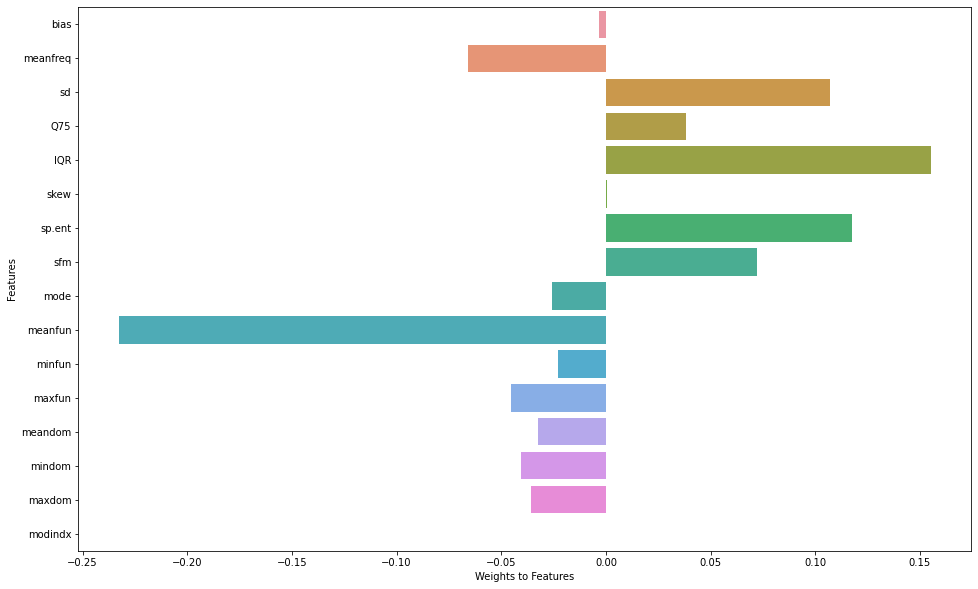

In [ ]:
#code here

features = []
features.append("bias")
for indx in range(len(voice_X.columns)):
    features.append(voice_X.columns[indx])

fig, axes = plt.subplots(1, 1, figsize=(16, 10))

sns.barplot(ax=axes, y=features, x=(lr.w).flatten())
axes.set_xlabel("Weights to Features")
axes.set_ylabel("Features")


# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel="linear" and kernel="rbf") on the Voice Recognition training data. 

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better? 

C) Please report the support vectors in both the cases and what do you observe? Explain.

In [ ]:
#code here

from sklearn import svm

print("\nLINEAR KERNEL\n")

clfLinear = svm.SVC(kernel='linear')
clfLinear.fit(voice_X_train, voice_y_train.flatten())

y_pred_train = clfLinear.predict(voice_X_train)
print("Training accuracy", accuracy_score(voice_y_train, y_pred_train))

y_pred_val = clfLinear.predict(voice_X_val)
print("Validation accuracy", accuracy_score(voice_y_val, y_pred_val))

y_pred_test = clfLinear.predict(voice_X_test)
print("Test accuracy", accuracy_score(voice_y_test, y_pred_test))

print("\nRBF KERNEL\n")

clf = svm.SVC(kernel='rbf')
clf.fit(voice_X_train, voice_y_train.flatten())

y_pred_train = clf.predict(voice_X_train)
print("Training accuracy", accuracy_score(voice_y_train, y_pred_train))

y_pred_val = clf.predict(voice_X_val)
print("Validation accuracy", accuracy_score(voice_y_val, y_pred_val))

y_pred_test = clf.predict(voice_X_test)
print("Test accuracy", accuracy_score(voice_y_test, y_pred_test))

print("\n")

totalPoints = clfLinear.support_vectors_
print("total number of support vectors for linear are=", len(totalPoints))

totalPoint_rbf = clf.support_vectors_
print("total number of support vectors for rbf are=", len(totalPoint_rbf))

'''
 Rbf kernel had better accuracy, which could be because of the non-linear boundary between the classes, 
  which possibly resulted in better classifer

  This can also cause the support vectors in case of rbf kernel to be more. 
'''


LINEAR KERNEL

Training accuracy 0.9742105263157895
Validation accuracy 0.9842271293375394
Test accuracy 0.9700315457413249

RBF KERNEL

Training accuracy 0.9831578947368421
Validation accuracy 0.9810725552050473
Test accuracy 0.9842271293375394


total number of support vectors for linear are= 164
total number of support vectors for rbf are= 279


**3.2 Using Kernel "rbf", tune the hyperparameter "C" using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**



In [ ]:
#code here

c_value= np.arange(1,100,20)
print(c_value)
      
#k-fold cross validation  & hyper-parameter tuning
# note we have 15 features left after dropping correlated columns 

features = ['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom',
       'modindx'] 

for val in c_value:
  preprocess = make_column_transformer((StandardScaler(),features))
  pipe = make_pipeline(preprocess,SVC(C=val,kernel='rbf'))
  scores = cross_val_score(pipe,voice_X_dev, voice_y_dev.ravel(),cv=5)
  print("C=",val)
  print(scores)
  print("Avg Score=", np.mean(scores))
  print("\n")

  #C=1 seems to perform better. 

[ 1 21 41 61 81]
C= 1
[0.99408284 0.97435897 0.96449704 0.98619329 0.98418972]
Avg Score= 0.9806643746443078


C= 21
[0.98619329 0.97633136 0.96449704 0.98619329 0.98221344]
Avg Score= 0.979085685774649


C= 41
[0.98422091 0.97830375 0.97238659 0.98422091 0.98221344]
Avg Score= 0.9802691177273116


C= 61
[0.98224852 0.97830375 0.9704142  0.98224852 0.98023715]
Avg Score= 0.978690428857653


C= 81
[0.97830375 0.97830375 0.9704142  0.98224852 0.98023715]
Avg Score= 0.9779014742225444


